# Section 2.1 Distributions

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

In [5]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 8265
np.random.seed(RANDOM_SEED)

# Distributions
A range of values and the relative occurrence, or belief, in each value

# Let's start with an observed point

In [12]:
observation = ["cow"]

Not much to see here

# Observed distribution
What we have seen and how much of each 

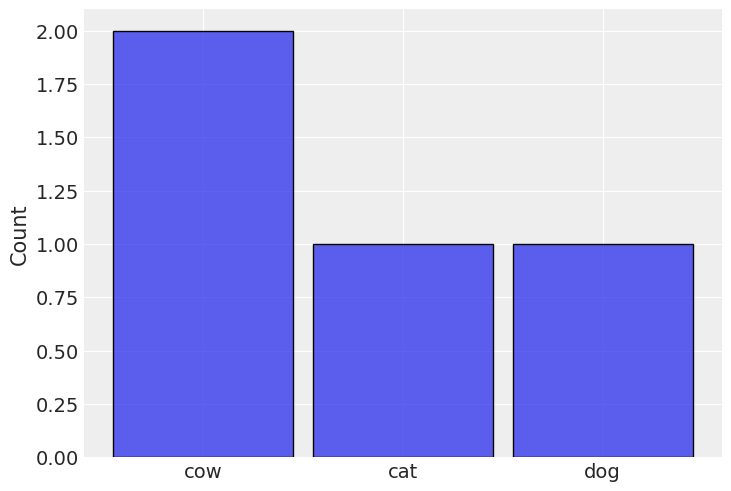

In [6]:
observations = ["cow", "cow", "cat", "dog"]
sns.histplot(observations, shrink=.9);

# Probability Distributions
Our observations can be turned into a probability distribution.Here the y axis has been changed from count to relative proportion

Probability distributions are a special case of distributions as  _the sum of all the bars is 1_.

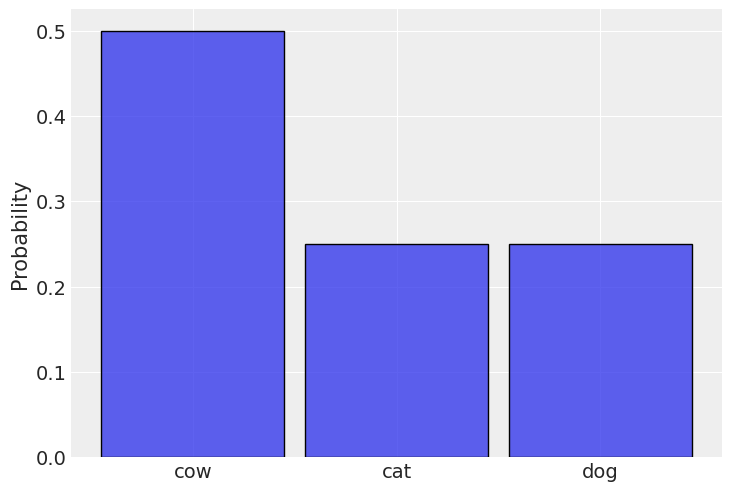

In [8]:
sns.histplot(observations, shrink=.9, stat="probability");

# But what about the continuous case?
So far we've covered data where things are in categories. What instead our observations were on a continuous scale? 
Like human heights, from the Howell distribution

In [22]:
height = pd.read_csv("data/Howell.csv")["height"]
height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

# Discretization of a continuous variable
This means split them up into bins and count, by doing this though we lost the "continuity" of our data and are forcing them into categories.

<AxesSubplot:xlabel='height', ylabel='Count'>

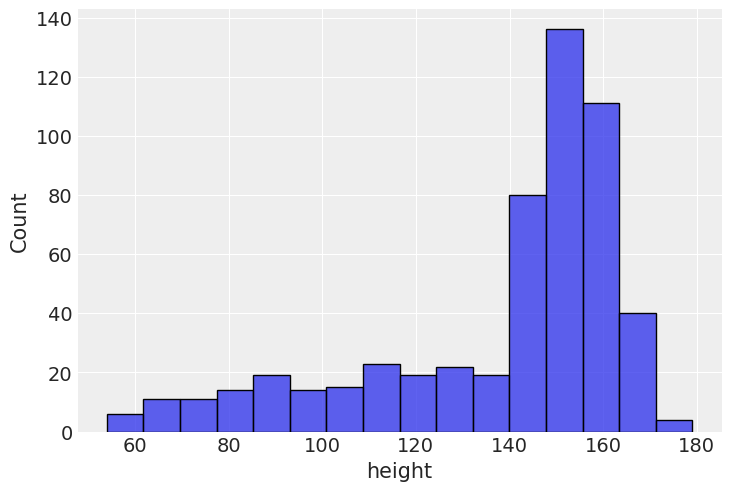

In [23]:
sns.histplot(heights)

# Describing the shape with a distribution
Instead of forcing categories we can instead use a continuous distribution. These are theoretical objects that we can do statistics wit

In particular we can use distribution that we can describe with parameters.

# Plotting a normal distribution of heights
An example is a normal distribution which can be specified with a mean and standard deviation.

Below we calculate the observed mean and standard deviation from the data and use it to plot a possible distribution of heights.

In [29]:
mean_height = heights.mean()
std_height = heights.std()
mean_height, std_height

(138.2635963235294, 27.602447640564694)

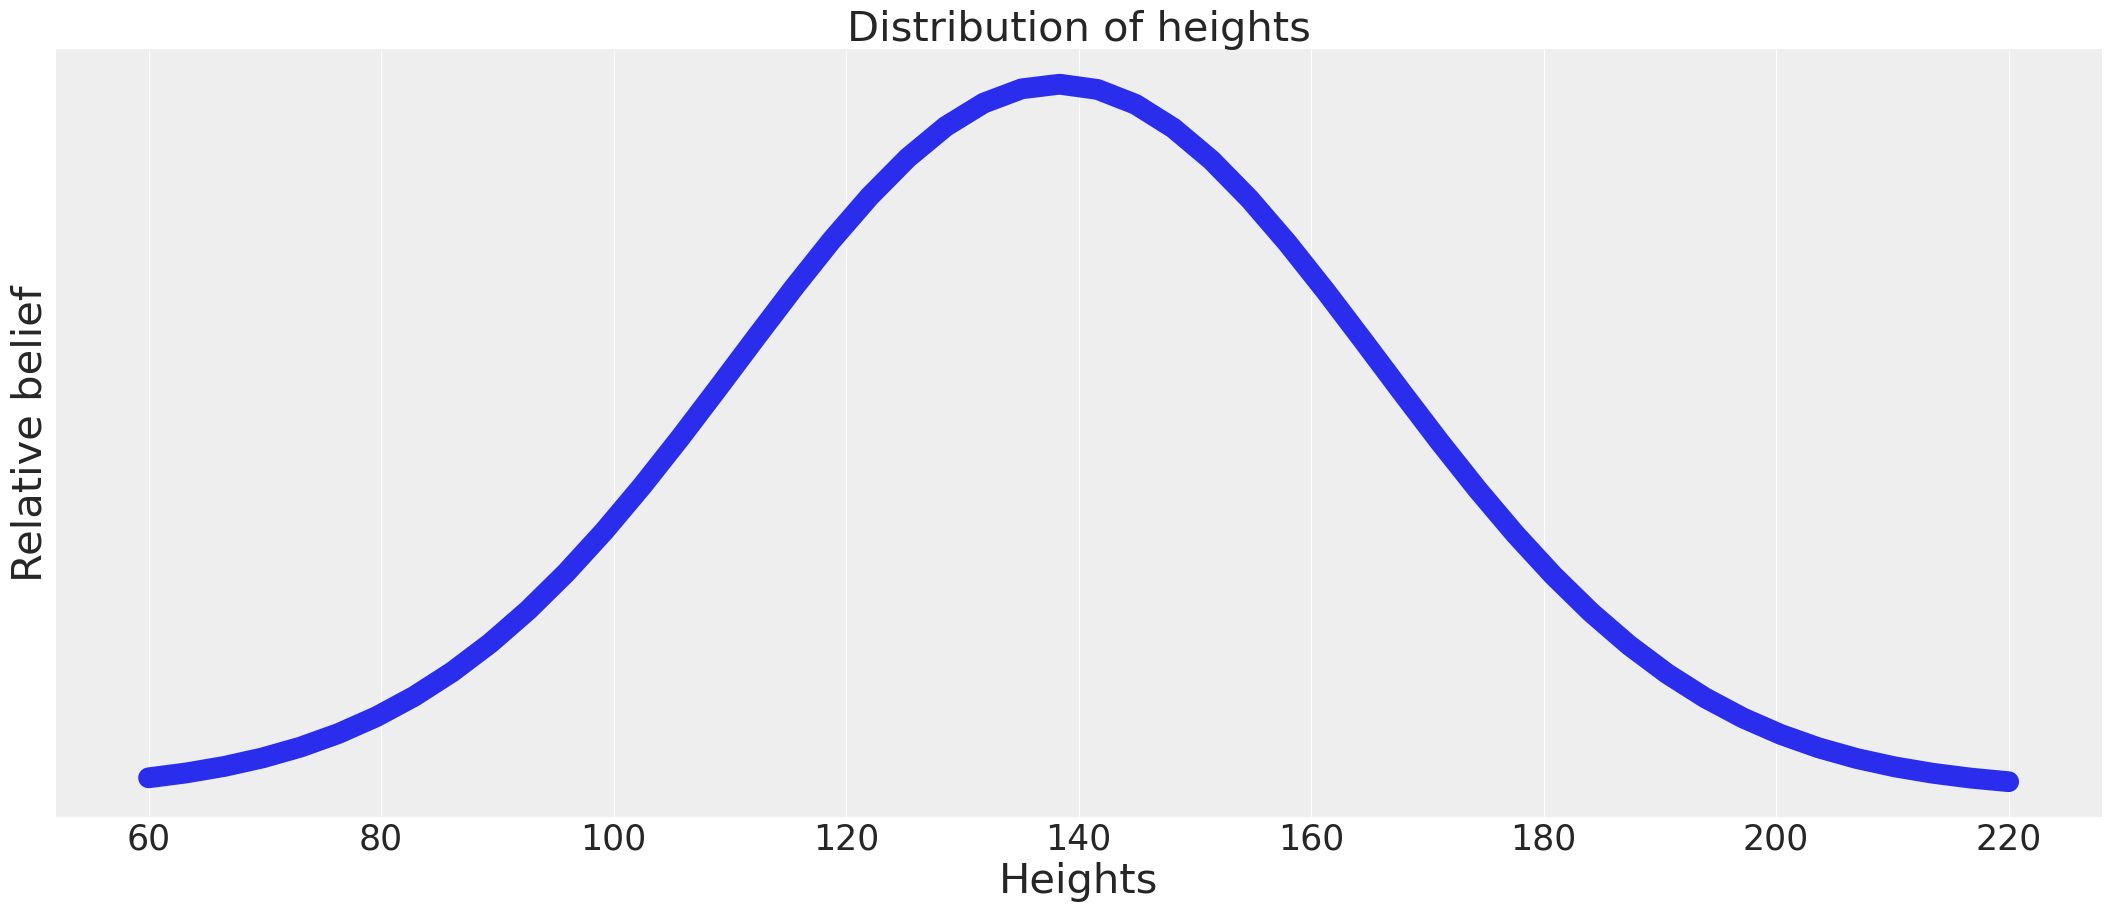

In [47]:
height_dist = stats.norm(mean_height, std_height)
x = np.linspace(60, 220)
y = height_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x,y, linewidth=15)

ax.set_yticks([])
ax.set_title("Distribution of heights", fontsize=30)
ax.set_xlabel("Heights", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# Moving from distributions of observations to observation of parameters
So now we have established that data can give rise to distributions, but distributions can be used in other ways too, like describing our belief in certain states of the world.

In our heights example, do we really believe the exact mean height of *all people* is 138.26 exactly? 
Why not 135, or 140, or 123.123423?


This is a critical switch now. Distributions describe not only what we observe, but also 
* What we can't directly observe
* Our belief in the parameters in other distributions
* The specific shape of our belief

For instance we may believe that the mean can be between 80 and 160 with equal probability, but not anything else. If so we can plot our belief in means as such.

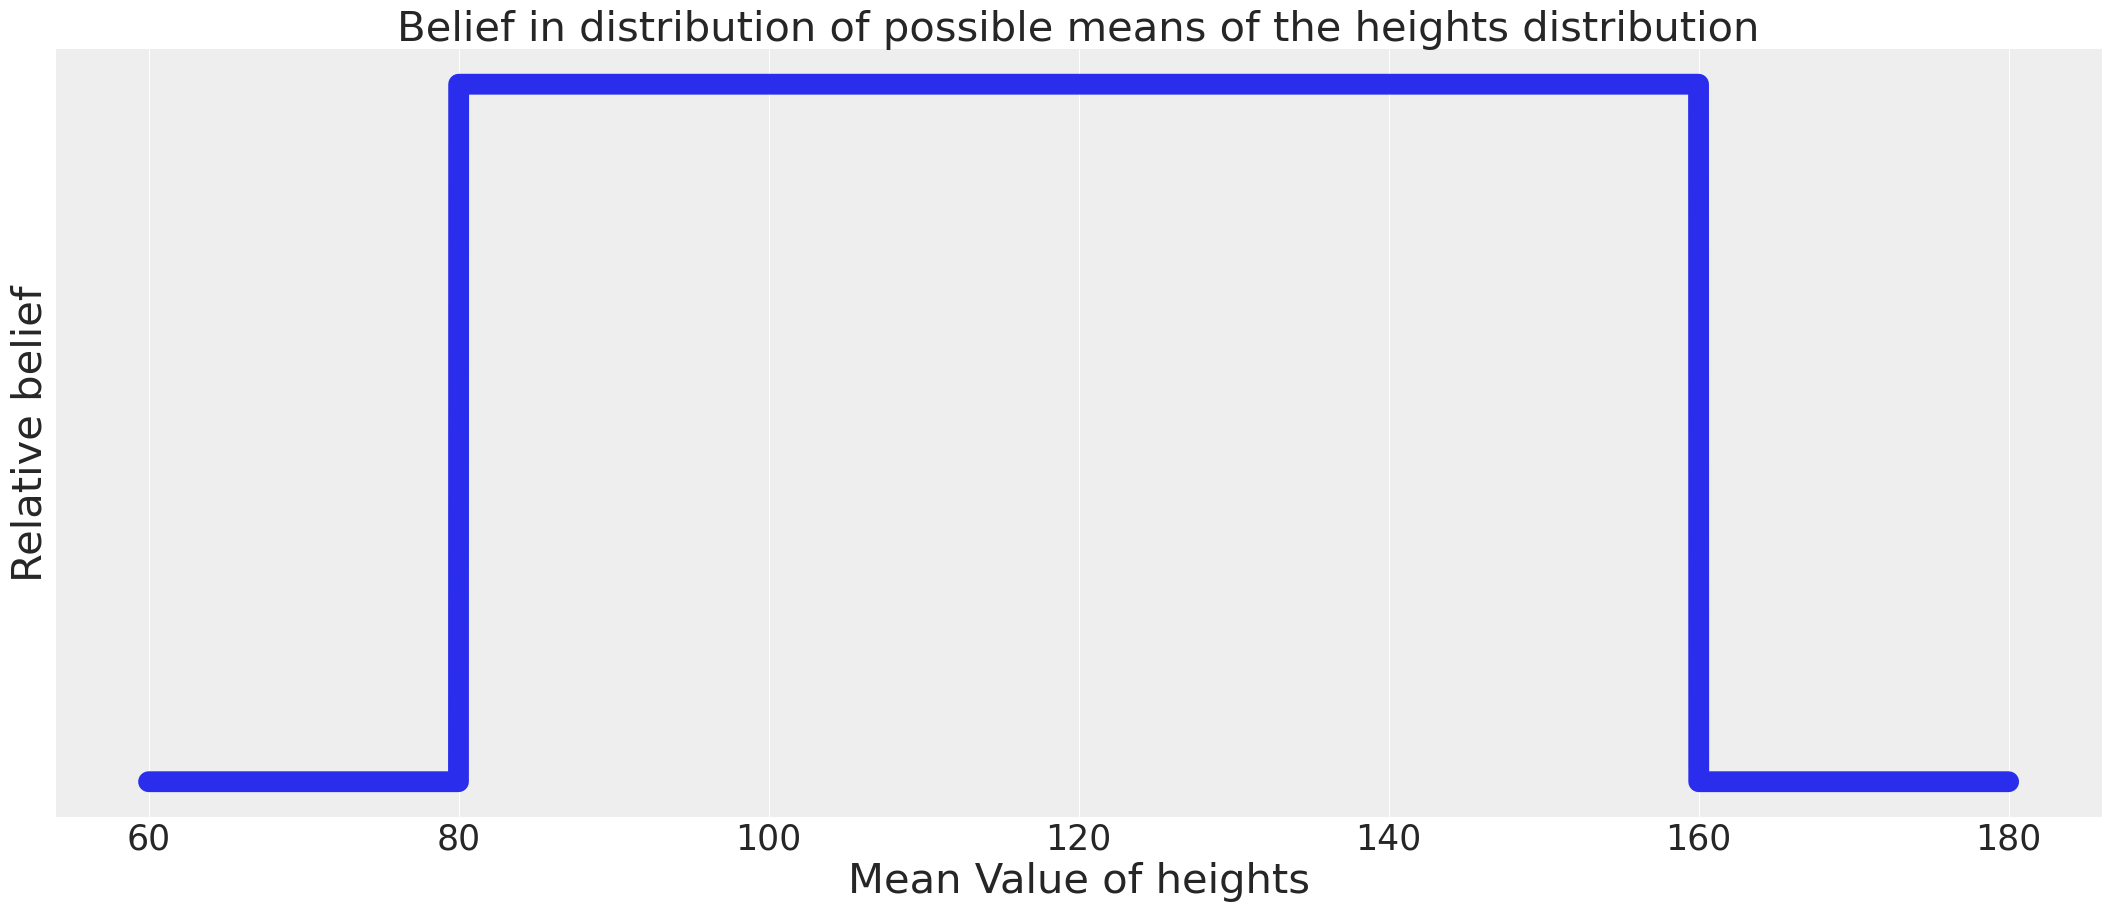

In [41]:
mean_height_dist = stats.uniform(80, 80)
x = np.linspace(60, 180, 10000)
y = mean_height_dist.pdf(x)
fig, ax = plt.subplots(figsize=(21,9))
ax.plot(x, y, linewidth=15)

ax.set_yticks([])
ax.set_title("Belief in distribution of possible means of the heights distribution", fontsize=30)
ax.set_xlabel("Mean Value of heights", fontsize=30)
ax.set_ylabel("Relative belief", fontsize=30)
ax.tick_params(axis='x', labelsize=25)

# Not just one belief, many beliefs
The key idea in distributions is that we don't just believe *one* value, we believe *every* value and can precisely describe by how much.

This distributional belief system is a key differentiator of Bayesian approaches versus most other machine learning methods as you will see later in this course.

# Distributions can be used to describe beliefs in many things
* The values of things we can directly observe
* Our beliefs in the parameters of other distributions
    * An example is Uniform distribution used to describe possible means for a Normal distribution
* Probabilities which are a *special case* of distributions

# Section Summary
* Distributions can describe many things, such as probability, observations, other parameters
    * Probability distributions are a special case of distributions
* We will be specifying and interacting with distributions primarily through code in this course